In [26]:
%load_ext autoreload
%autoreload 2

import os
from pprint import pprint

from math import sqrt
import pickle
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D
from sklearn.metrics import auc 

print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/matthew/git/cadc_testing/uncertainty_eval


In [7]:
baseline_precision_scores = [1.0, 0.9844915995535849, 0.9806893796255499, 0.9844916112598654, 0.985446780861262, 0.9822067473344204, 0.9800585357980857, 0.9790688371500346, 0.9759777059817082, 0.976081918468937, 0.9716827697191752, 0.9684485159260319, 0.9642416376006632, 0.9615499449398343, 0.9559015311947242, 0.9496369242687348, 0.9413781912568717, 0.9338052765727549, 0.9251110676836878, 0.9172936969540538, 0.9069559774704666, 0.8944883137295023, 0.8788612955020619, 0.8658320077438746, 0.8492238227249223, 0.8246326212562958, 0.8025783941089765, 0.7741637707173231, 0.7420135878663529, 0.6932077856719024, 0.6326115385454124, 0.538946333741842, 0.15194115022072543, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
baseline_recall_scores = [0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225, 0.25, 0.275, 0.30000000000000004, 0.325, 0.35000000000000003, 0.375, 0.4, 0.42500000000000004, 0.45, 0.47500000000000003, 0.5, 0.525, 0.55, 0.5750000000000001, 0.6000000000000001, 0.625, 0.65, 0.675, 0.7000000000000001, 0.7250000000000001, 0.75, 0.775, 0.8, 0.8250000000000001, 0.8500000000000001, 0.875, 0.9, 0.925, 0.9500000000000001, 0.9750000000000001, 1.0]

In [8]:
mc_dropout_precision_scores = [1.0, 0.9844915995535849, 0.984491608338978, 0.9794284920248931, 0.9816371859202572, 0.9822067473344204, 0.9800585357980857, 0.9779914425124406, 0.9722408331634604, 0.9686350956667936, 0.9632053095812307, 0.9607866736791003, 0.9599886578449905, 0.9532200892776758, 0.950026055763835, 0.945628898246173, 0.9407242747530998, 0.9323933920671958, 0.9226832732326583, 0.9122636997576393, 0.8905743086721143, 0.8739638682688241, 0.8528322906240059, 0.8257986284596385, 0.7968149362921617, 0.762617692175597, 0.7359283471390675, 0.705494200104573, 0.673802821976854, 0.635973425236217, 0.5710136232198719, 0.4271195771591561, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mc_dropout_recall_scores = [0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225, 0.25, 0.275, 0.30000000000000004, 0.325, 0.35000000000000003, 0.375, 0.4, 0.42500000000000004, 0.45, 0.47500000000000003, 0.5, 0.525, 0.55, 0.5750000000000001, 0.6000000000000001, 0.625, 0.65, 0.675, 0.7000000000000001, 0.7250000000000001, 0.75, 0.775, 0.8, 0.8250000000000001, 0.8500000000000001, 0.875, 0.9, 0.925, 0.9500000000000001, 0.9750000000000001, 1.0]

In [9]:
ensemble_precision_scores = [1.0, 0.9921852022058824, 0.9941274317946356, 0.9960772764603224, 0.9941274334858384, 0.9945167915348228, 0.9941274340488369, 0.9927393563097923, 0.989768075815452, 0.9874693480009932, 0.9841100664065668, 0.9803451872925557, 0.9778569363501244, 0.9737465062385335, 0.9707805949346374, 0.9662597111941986, 0.9614274216809439, 0.9565672621489063, 0.9514952167003589, 0.9423780288890042, 0.9312368198125516, 0.9189993832903769, 0.905207125913412, 0.8906557978238827, 0.8769642544706501, 0.8598154572655198, 0.8389894585786343, 0.8194090456196935, 0.79061259414697, 0.7592491870320359, 0.7253791030158439, 0.6743099318663023, 0.5904545977835058, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ensemble_recall_scores = [0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225, 0.25, 0.275, 0.30000000000000004, 0.325, 0.35000000000000003, 0.375, 0.4, 0.42500000000000004, 0.45, 0.47500000000000003, 0.5, 0.525, 0.55, 0.5750000000000001, 0.6000000000000001, 0.625, 0.65, 0.675, 0.7000000000000001, 0.7250000000000001, 0.75, 0.775, 0.8, 0.8250000000000001, 0.8500000000000001, 0.875, 0.9, 0.925, 0.9500000000000001, 0.9750000000000001, 1.0]

In [14]:
mimo_a_precision_scores = [1.0, 0.9921852022058824, 0.984491608338978, 0.9832209302325582, 0.9835382944235574, 0.9837288112694325, 0.985128187009703, 0.9823153111056138, 0.976916416916417, 0.9752488441352427, 0.9746665380201897, 0.9738509674911877, 0.9710015611894278, 0.9694569055385547, 0.9636753004329575, 0.9570338261425246, 0.9506294160118475, 0.9450492307661335, 0.9359085923467452, 0.930742778243748, 0.9191023430168861, 0.9105256186609643, 0.8976435515049693, 0.8863304379557505, 0.8713219520540735, 0.8549519365483544, 0.8369685789286802, 0.8094445378471077, 0.7838141747626862, 0.7482174288108377, 0.6973566764897641, 0.6222827854035237, 0.4861087841669782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mimo_a_recall_scores = [0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225, 0.25, 0.275, 0.30000000000000004, 0.325, 0.35000000000000003, 0.375, 0.4, 0.42500000000000004, 0.45, 0.47500000000000003, 0.5, 0.525, 0.55, 0.5750000000000001, 0.6000000000000001, 0.625, 0.65, 0.675, 0.7000000000000001, 0.7250000000000001, 0.75, 0.775, 0.8, 0.8250000000000001, 0.8500000000000001, 0.875, 0.9, 0.925, 0.9500000000000001, 0.9750000000000001, 1.0]


In [17]:
mimo_b_precision_scores = [1.0, 1.0, 0.9980347833485451, 0.9947765320227308, 0.9941274334858384, 0.9921852093921032, 0.9896073517126148, 0.9866775826230464, 0.9811630592236474, 0.9785897029274588, 0.974292565237755, 0.967442222370412, 0.961199961798913, 0.9548744945963404, 0.9447242188448113, 0.9338052767551501, 0.9179809293313012, 0.90559556006504, 0.8941633318574899, 0.8799834009840904, 0.8687879555877737, 0.8555939292230451, 0.8435600647241547, 0.830141678212527, 0.8140578659435015, 0.7999023449407024, 0.7809333986396203, 0.7670613309351032, 0.7441882370121092, 0.7130773491357124, 0.6755270795756496, 0.6257454976756754, 0.48759646151845143, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mimo_b_recall_scores = [0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225, 0.25, 0.275, 0.30000000000000004, 0.325, 0.35000000000000003, 0.375, 0.4, 0.42500000000000004, 0.45, 0.47500000000000003, 0.5, 0.525, 0.55, 0.5750000000000001, 0.6000000000000001, 0.625, 0.65, 0.675, 0.7000000000000001, 0.7250000000000001, 0.75, 0.775, 0.8, 0.8250000000000001, 0.8500000000000001, 0.875, 0.9, 0.925, 0.9500000000000001, 0.9750000000000001, 1.0]

In [24]:
mimo_c_precision_scores = [1.0, 1.0, 0.9921852067025441, 0.9844916112598654, 0.985446780861262, 0.9844916135938562, 0.9819535284851143, 0.9817727378115934, 0.9816371884945235, 0.9785897029274588, 0.9776686874148326, 0.9758924589811013, 0.9737943815302994, 0.9700266673872124, 0.966032147056738, 0.9635708184528534, 0.9602911975272014, 0.9517166490202599, 0.9442223662893228, 0.9356161787521176, 0.9271565489137988, 0.9148998222387694, 0.9049138630558872, 0.8910634657054333, 0.877216719998336, 0.8590010314999279, 0.8432760039914475, 0.8150256033171696, 0.7857198110122324, 0.7479894255412366, 0.6957008146112049, 0.6235150602655323, 0.4625859630560409, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mimo_c_recall_scores = [0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225, 0.25, 0.275, 0.30000000000000004, 0.325, 0.35000000000000003, 0.375, 0.4, 0.42500000000000004, 0.45, 0.47500000000000003, 0.5, 0.525, 0.55, 0.5750000000000001, 0.6000000000000001, 0.625, 0.65, 0.675, 0.7000000000000001, 0.7250000000000001, 0.75, 0.775, 0.8, 0.8250000000000001, 0.8500000000000001, 0.875, 0.9, 0.925, 0.9500000000000001, 0.9750000000000001, 1.0]

In [41]:
baseline_auc = auc(baseline_recall_scores, baseline_precision_scores)
mcdropout_auc = auc(mc_dropout_recall_scores, mc_dropout_precision_scores)
ensemble_auc = auc(ensemble_recall_scores, ensemble_precision_scores)
mimo_a_auc = auc(mimo_a_recall_scores, mimo_a_precision_scores)
mimo_b_auc = auc(mimo_b_recall_scores, mimo_b_precision_scores)
mimo_c_auc = auc(mimo_c_recall_scores, mimo_c_precision_scores)

baseline_auc_str = 'Baseline, AUC = ' + str(baseline_auc.round(2))
mcdropout_auc_str = 'MC Dropout, AUC = ' + str(mcdropout_auc.round(2))
ensemble_auc_str = 'Ensemble, AUC = ' + str(ensemble_auc.round(2))
mimo_a_auc_str = 'MIMO-ID, AUC = ' + str(mimo_a_auc.round(2))
mimo_b_auc_str = 'MIMO-noID, AUC = ' + str(mimo_b_auc.round(2))
mimo_c_auc_str = 'MIMO-BEV, AUC = ' + str(mimo_c_auc.round(2))

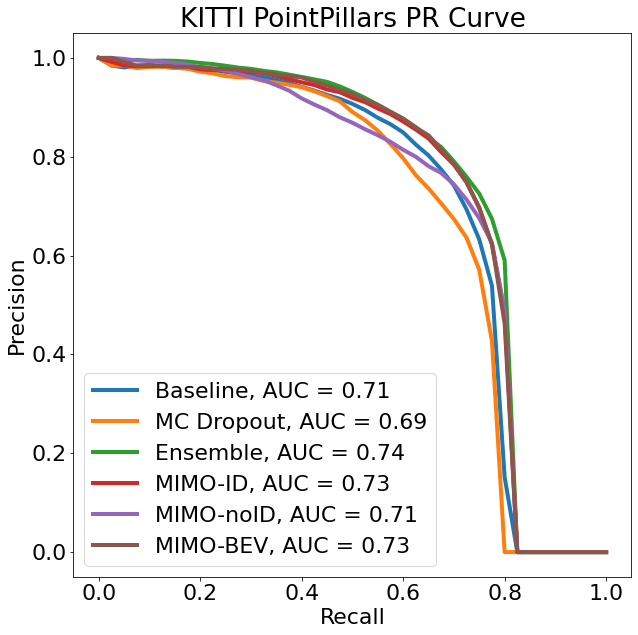

In [42]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 22})

plt.plot(baseline_recall_scores, baseline_precision_scores, linewidth=4, label=baseline_auc_str)
plt.plot(mc_dropout_recall_scores, mc_dropout_precision_scores, linewidth=4, label=mcdropout_auc_str)
plt.plot(ensemble_recall_scores, ensemble_precision_scores, linewidth=4, label=ensemble_auc_str)
plt.plot(mimo_a_recall_scores, mimo_a_precision_scores, linewidth=4, label=mimo_a_auc_str)
plt.plot(mimo_b_recall_scores, mimo_b_precision_scores, linewidth=4, label=mimo_b_auc_str)
plt.plot(mimo_c_recall_scores, mimo_c_precision_scores, linewidth=4, label=mimo_c_auc_str)

plt.title('KITTI PointPillars PR Curve')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()